In [23]:
#importing all the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Reading the data form the file
iris = pd.read_csv('iris.csv', sep=',')

In [3]:
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [4]:
iris.shape

(150, 5)

In [5]:
iris.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
iris.variety.value_counts()

Virginica     50
Versicolor    50
Setosa        50
Name: variety, dtype: int64

In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal.length    150 non-null float64
sepal.width     150 non-null float64
petal.length    150 non-null float64
petal.width     150 non-null float64
variety         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


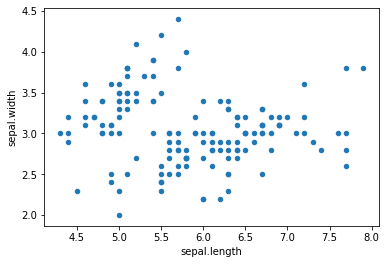

In [8]:
iris.plot(kind='scatter', x='sepal.length', y='sepal.width')
plt.show()

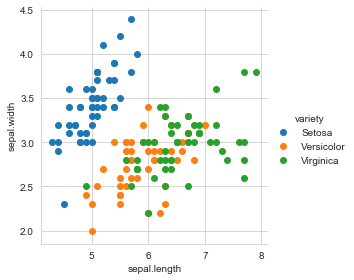

In [10]:
sns.set_style('whitegrid')
sns.FacetGrid(iris, hue='variety', height=4).map(plt.scatter, "sepal.length", "sepal.width").add_legend()
plt.show()

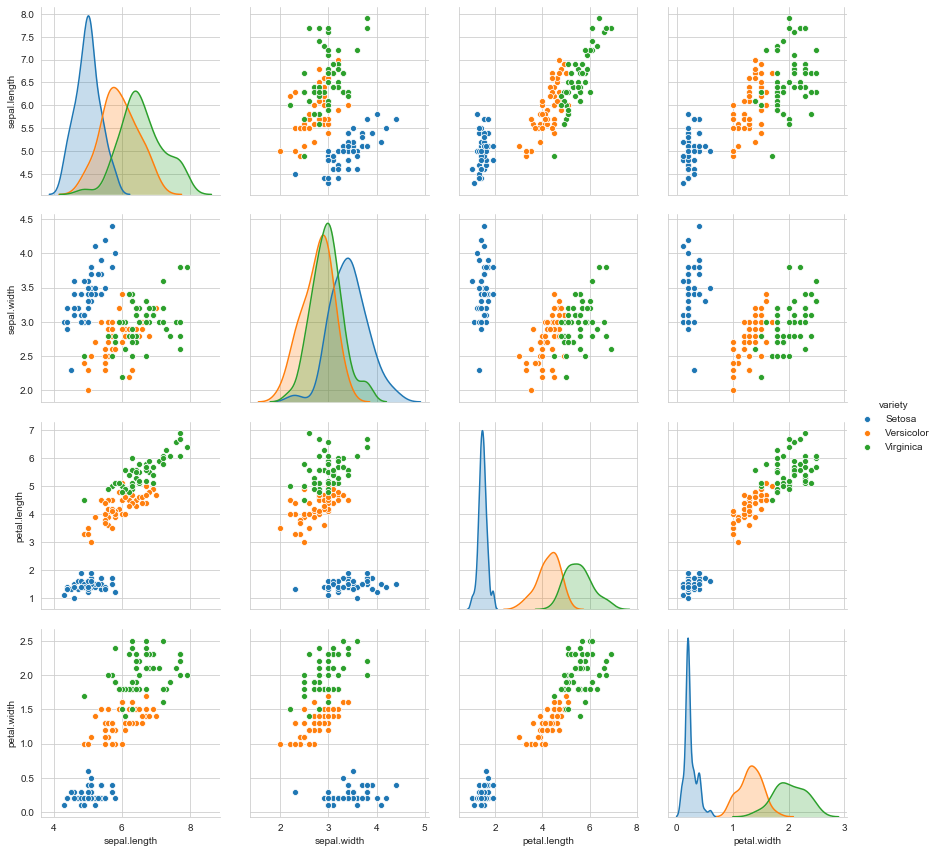

In [11]:
# pair plot between 2 variables out of 4 variables 4C2 = 6
plt.close()
sns.set_style('whitegrid')
sns.pairplot(iris, hue='variety', height=3)
plt.show()

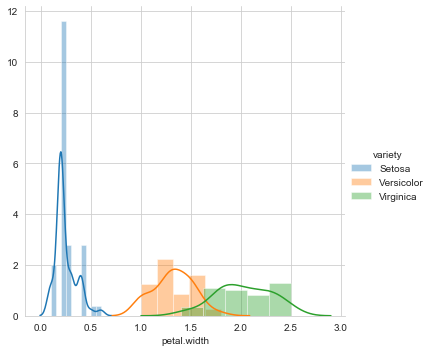

In [15]:
# univariate analysis - used to answer which feature out of the 4 is more useful than other features.
sns.FacetGrid(iris, hue='variety', height=5).map(sns.distplot, "petal.width").add_legend()
plt.show()

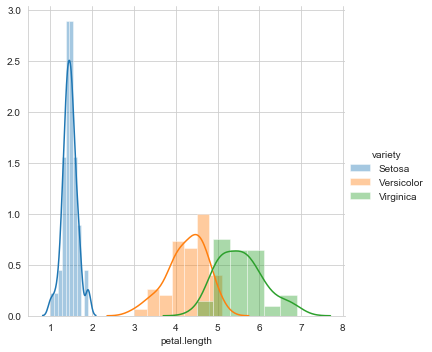

In [16]:
sns.FacetGrid(iris, hue='variety', height=5).map(sns.distplot, "petal.length").add_legend()
plt.show()

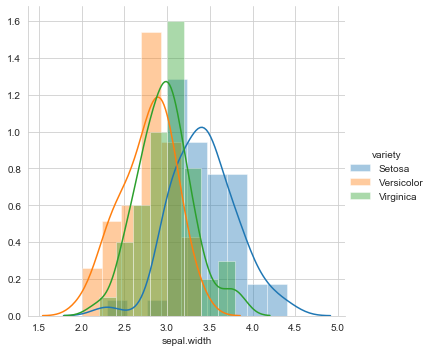

In [17]:
sns.FacetGrid(iris, hue='variety', height=5).map(sns.distplot, "sepal.width").add_legend()
plt.show()

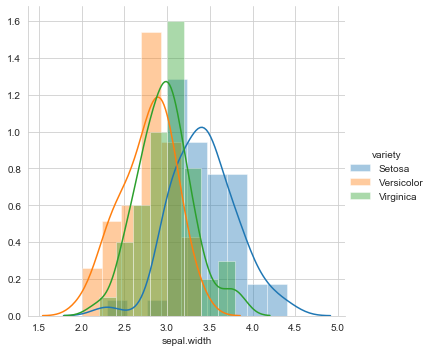

In [18]:
sns.FacetGrid(iris, hue='variety', height=5).map(sns.distplot, "sepal.width").add_legend()
plt.show()

In [31]:
#calculating the quantiles
print('Quantiles:')
print('Petal length of Setosa:',np.percentile(iris[iris.variety == 'Setosa']['petal.length'], np.arange(0,100,25)))
print('Petal length of Versicolor:',np.percentile(iris[iris.variety == 'Versicolor']['petal.length'], np.arange(0,100,25)))
print('Petal length of Virginica:',np.percentile(iris[iris.variety == 'Virginica']['petal.length'], np.arange(0,100,25)))

Quantiles:
Petal length of Setosa: [1.    1.4   1.5   1.575]
Petal length of Versicolor: [3.   4.   4.35 4.6 ]
Petal length of Virginica: [4.5   5.1   5.55  5.875]


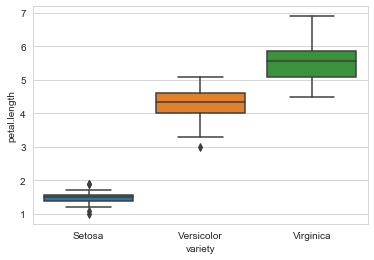

In [32]:
#to visulaize the quantiles, plot boxplots
sns.boxplot(x='variety', y='petal.length', data=iris)
plt.show()

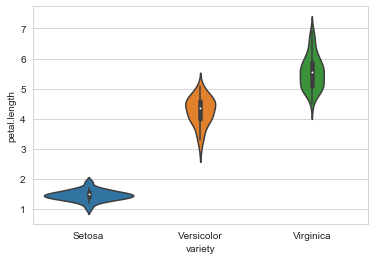

In [33]:
#to visulaize both histogrmas and boxplot, plot violinplots
#best of both worlds
sns.violinplot(x='variety', y='petal.length', data=iris)
plt.show()

In [35]:
#pre-processign the data
#creating a dataset without the variety
iris_test = iris.drop(['variety'], axis=1)
iris_test.shape

(150, 4)

In [39]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
variety_encode = label_encoder.fit_transform(iris['variety'])
variety_encode

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [41]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaled = StandardScaler() # load the standard scaler
scaled.fit(iris_test) # compute the mean and sd of the features
iris_test_scaled = scaled.transform(iris_test) # scale the feature data from mean 0 to variance 1

In [42]:
#splitting data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris_test_scaled, variety_encode, test_size=.3, random_state=1)
# splitting into 70% training data and 30% testing data

In [45]:
# applying KMeans to classify data
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

mod = KNeighborsClassifier(n_neighbors=3)
mod.fit(X_train, y_train)
prediction = mod.predict(X_test)
accuracy = accuracy_score(y_test, prediction) * 100

print('K-nearest Neighbours accuracy score: ' + str(round(accuracy,2)) + '%.')

K-nearest Neighbours accuracy score: 97.78%.


In [46]:
prediction

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
       1])